<a href="https://colab.research.google.com/github/Marsilea-viz/marsilea-workshop/blob/main/Marsilea-complexheatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install marsilea mpl_fontkit

# Task 1: Visualization of single-cell expression matrix with complex heatmap

The final visualization should look like:

<img src="https://marsilea.readthedocs.io/en/stable/_images/sphx_glr_plot_pbmc3k_001_2_00x.png" width="500px">

# Import essential pacakges and load data

In [2]:
%config InlineBackend.figure_format = 'retina'
from sklearn.preprocessing import normalize
from matplotlib.colors import Normalize

import marsilea as ma
import marsilea.plotter as mp
import mpl_fontkit as fk

fk.install("Lato", verbose=False)

pbmc3k = ma.load_data("pbmc3k")
exp = pbmc3k["exp"]
pct_cells = pbmc3k["pct_cells"]
count = pbmc3k["count"]

matrix = normalize(exp.to_numpy(), axis=0)

cell_cat = [
    "Lymphoid",
    "Myeloid",
    "Lymphoid",
    "Lymphoid",
    "Lymphoid",
    "Myeloid",
    "Myeloid",
    "Myeloid",
]
cell_names = [
    "CD4 T",
    "CD14\nMonocytes",
    "B",
    "CD8 T",
    "NK",
    "FCGR3A\nMonocytes",
    "Dendritic",
    "Megakaryocytes",
]

Starting with a `Heatmap` canvas, to indicate the proportion of cells, we can achive with `SizedMesh` to show the proportion as the size of a circle. And mark the high expression gene with a star marker using `MarkerMesh`.

In [3]:
cells_proportion = mp.SizedMesh(
    pct_cells,
    # Limit the size from 0% to 100%
    size_norm=Normalize(vmin=0, vmax=100),
    # Doesn't fill the color
    color="none",
    edgecolor="#6E75A4",
    linewidth=2,
    sizes=(1, 600),
    # To take control of legends
    size_legend_kws=dict(title="% of cells", show_at=[0.3, 0.5, 0.8, 1]),
)

mark_high = mp.MarkerMesh(matrix > 0.7, color="#DB4D6D", label="High")

Now we add the two plotter to the main canvas with `add_layer`.

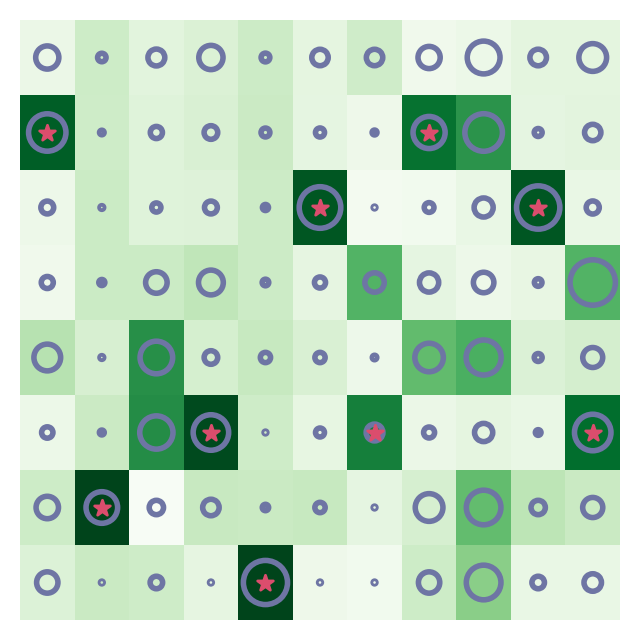

In [4]:
h = ma.Heatmap(matrix, cmap="Greens", label="Normalized\nExpression", width=3, height=3)
h.add_layer(cells_proportion)
h.add_layer(mark_high)
h.render()

The next thing we want to do is to add components like text labels, cell numbers and expression distribution to the heatmap.

In [5]:
cell_count = mp.Numbers(count["Value"], color="#fac858", label="Cell Count")
cell_exp = mp.Violin(
    exp, label="Expression", linewidth=0, color="#ee6666", density_norm="count"
)
cell_types = mp.Labels(cell_names, align="center")
gene_names = mp.Labels(exp.columns)

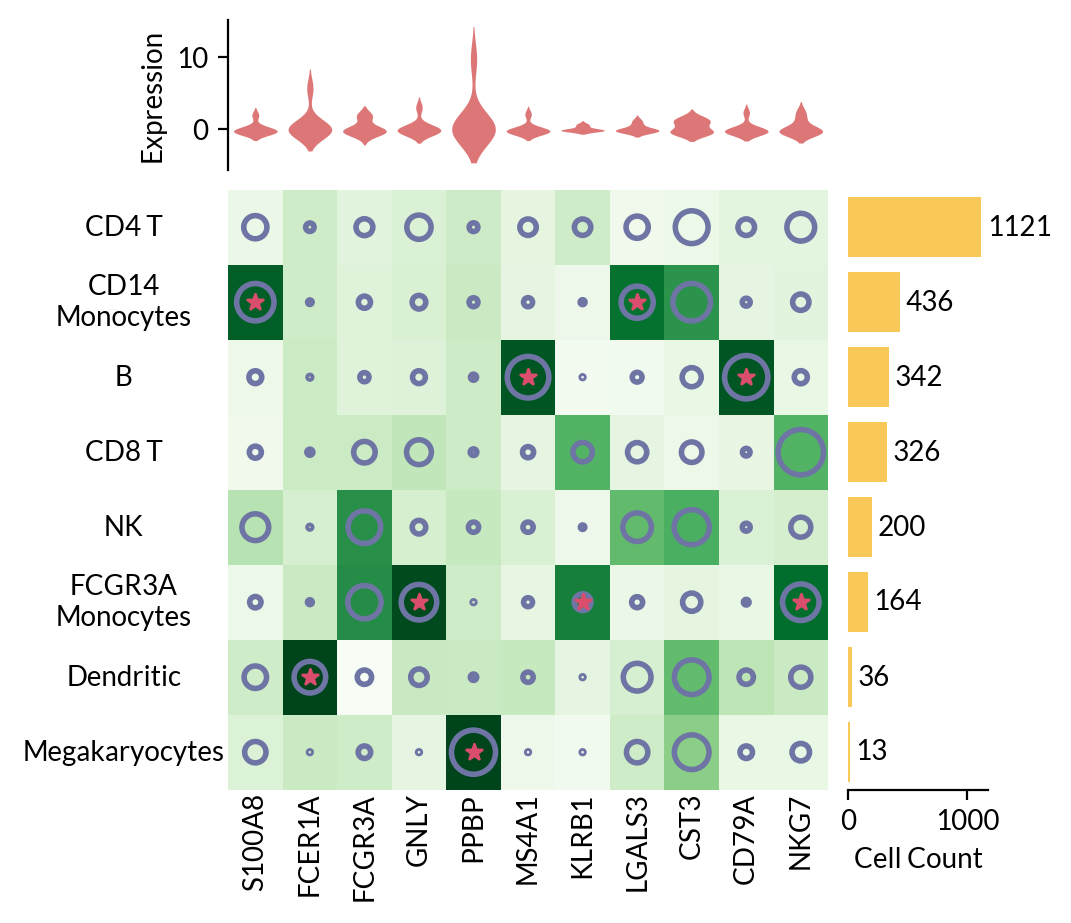

In [6]:
h.add_right(cell_count, pad=0.1, size=0.7)
h.add_top(cell_exp, pad=0.1, size=0.75, name="exp")
h.add_left(cell_types)
h.add_bottom(gene_names)
h.render()

Now let's group the heatmap based on the cell types

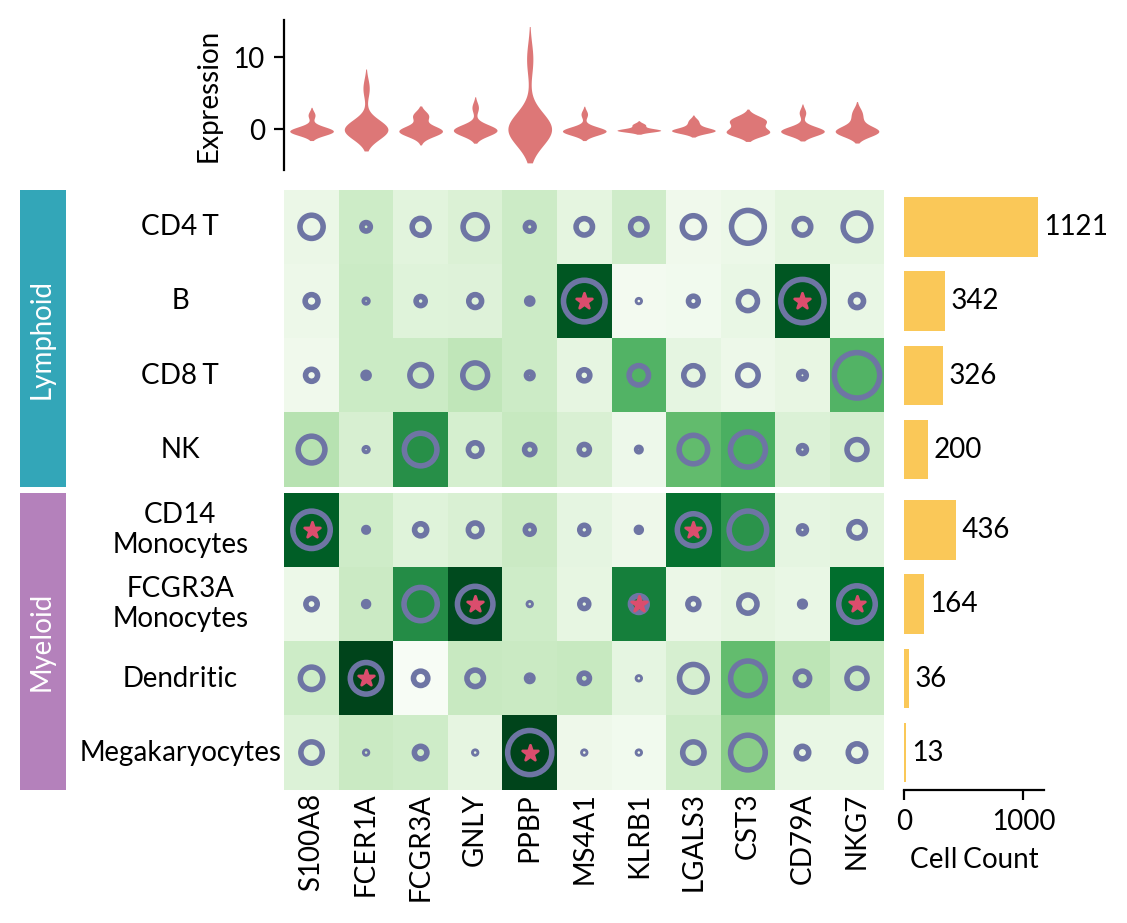

In [7]:
h.group_rows(cell_cat, order=["Lymphoid", "Myeloid"])
h.add_left(mp.Chunk(["Lymphoid", "Myeloid"], ["#33A6B8", "#B481BB"]), pad=0.05)
h.render()

Now let's just add the remaining components, like the dendrogram and legends

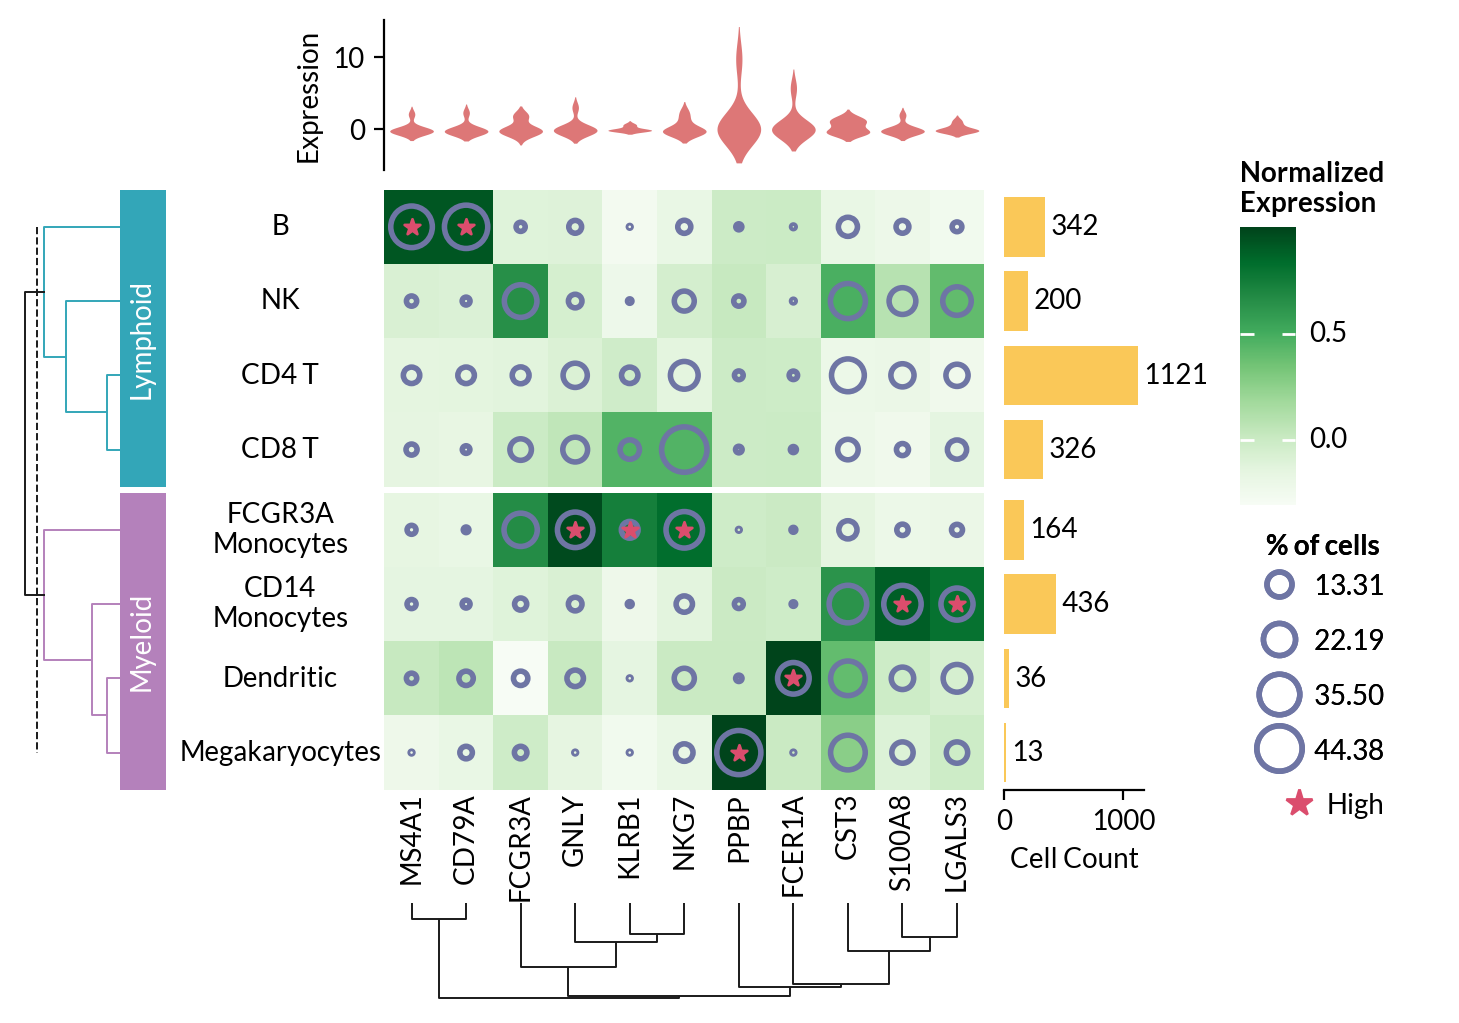

In [8]:
h.add_dendrogram("left", colors=["#33A6B8", "#B481BB"])
h.add_dendrogram("bottom")
h.add_legends("right", align_stacks="center", align_legends="top", pad=0.2)
h.render()